In [1]:
import numpy as np

import pandas as pd


import matplotlib.pyplot as mpl

import scipy.optimize 


def fit_func(x,y,dy, f, par = []):
    
    if(len(dy)==1):
        popt1, pcov1 = scipy.optimize.curve_fit(f, x, y, par, maxfev=100000)
    else:
        popt1, pcov1 = scipy.optimize.curve_fit(f, x, y,par, dy,maxfev=100000)
        
        
    Nparam = len(popt1)
  
    res = np.zeros((Nparam,2))
    res[:,0] = popt1
    
    for i in range(Nparam):
        res[i,1] =  np.sqrt(pcov1[i,i])
        
    y_med = np.mean(y)
    arg = popt1 
    fy = f(x, *arg)
    
    R2 = 1 - np.sum((fy - y)**2)/np.sum((y - y_med)**2)
    
    if(len(dy)==1):
        X2 = np.sum( (fy-y)**2)
    else:
        X2 = np.sum( (fy-y)**2/dy**2)
    
    F = (len(x)-2)*(1./(1-R2) -1)
    
    Res = np.sum((fy - y)**2)
    
    return(res, R2, X2, F, Res) 

def lin_fit(x,m,q):
    return(x*m+q)

def const_fit(x,c):
    return(c)


def combo(x,x0,A,m0,m1):
    
    res = np.abs(m0)*x0+ np.abs(A)*(np.exp(np.abs(m1)*(x-x0)) -1)
    res[x<x0] = np.abs(m0)*x[x<x0]
    return(res)

def exp_fit(x,A,m1):
    
    res = np.abs(A) * np.exp(np.abs(m1)*x)
    return(res)



In [2]:



def wcov(x,y,w):
    
    mx = np.sum(x*w)/np.sum(w)
    my = np.sum(y*w)/np.sum(w)

    c = np.sum( w*(x-mx)*(y-my) )/np.sum(w)

    return(c)

def wcorr(x,y,w):
    wcor = wcov(x,y, w)/np.sqrt(wcov(x,x, w) * wcov(y,y, w))
    return(wcor)


# Computing p8 descriptor and data reorganization

In [3]:
## defining infection matrixes..
W2 = np.matrix([[1,0],[1,1]])


W4 = np.matrix([[1,0,0,0],
      [1,1,0,0],
      [1,0,1,0],
      [1,1,1,1]])

W8 = np.zeros((8,8))

W8[:4,:4] = W4
W8[4:,:4] = W4
W8[4:,4:] = W4

#f4 = (f_0, f_A, f_B, F_AB)
#f8 = (f_0-, f_A-, f_B-, f_AB-, f_0+, f_A+, f_B+, f_AB+)

#p = f*W*f

In [4]:
prova = pd.read_csv("WHO-COVID-19-global-data_used.csv")

In [5]:
len(np.unique(prova["Country"]))

216

In [6]:
data_all = pd.read_csv("Blood_freq_world2.txt")

data_all["Class"]
#list(data_all["Nation"])

0        S
1        N
2        S
3        N
4        N
      ... 
103      C
104      C
105      N
106      C
107    NCS
Name: Class, Length: 108, dtype: object

In [7]:
freq_sum = np.sum(data_all[data_all.columns[4:]], axis=1)
#print(data_all[freq_sum!= 100])
#freq_sum[freq_sum != 100]


In [8]:
plus = np.matrix(data_all[data_all.columns[5:9]])
minus = np.matrix(data_all[data_all.columns[9:]])

Nnations = np.shape(plus)[0]


f_tmp_2 = np.column_stack([np.sum(minus, axis=1), np.sum(plus, axis=1)])*0.01
f_tmp_4 = (minus+plus)*0.01
f_tmp_8 = np.column_stack([minus,plus])*0.01


p2_vet = np.zeros(Nnations)
p4_vet = np.zeros(Nnations)
p8_vet = np.zeros(Nnations)

for i in range(Nnations):

    p2_vet[i] = f_tmp_2[i,:].dot(np.dot(W2,np.transpose(f_tmp_2[i,:])))
    p4_vet[i] = f_tmp_4[i,:].dot(np.dot(W4,np.transpose(f_tmp_4[i,:])))
    p8_vet[i] = f_tmp_8[i,:].dot(np.dot(W8,np.transpose(f_tmp_8[i,:])))

In [9]:
df_all = pd.DataFrame(data_all["Nation"], columns= ["Nation"]) 
df_all.insert(1,"Continent", data_all["Continent"], True)
df_all.insert(2,"Acronym", data_all["Acronym"], True)
df_all.insert(3,"Population", data_all["Population"], True)

df_all.insert(4,"O-", data_all["O−"]*0.01, True)
df_all.insert(5,"A-", data_all["A−"]*0.01, True)
df_all.insert(6,"B-", data_all["B−"]*0.01, True)
df_all.insert(7,"AB-", data_all["AB−"]*0.01, True)

df_all.insert(8,"O+", data_all["O+"]*0.01, True)
df_all.insert(9,"A+", data_all["A+"]*0.01, True)
df_all.insert(10,"B+", data_all["B+"]*0.01, True)
df_all.insert(11,"AB+", data_all["AB+"]*0.01, True)

df_all.insert(12,"p2", p2_vet, True)
df_all.insert(13,"p4", p4_vet, True)
df_all.insert(14,"p8", p8_vet, True)

df_all.insert(15,"m0", np.ones(len(p8_vet))*-1, True)
df_all.insert(16,"dm0", np.ones(len(p8_vet))*-1, True)

df_all.insert(17,"m1", np.ones(len(p8_vet))*-1, True)
df_all.insert(18,"dm1", np.ones(len(p8_vet))*-1, True)


df_all.insert(19,"R2", np.ones(len(p8_vet))*-1, True)
df_all.insert(20,"Class", data_all["Class"], True)


print("World is made of %d nations"%(np.shape(df_all)[0]-1))

World is made of 107 nations


In [10]:
data_lord = pd.read_csv("df_data_inf.csv")

data_lord

dati_ = np.zeros(np.shape(data_lord[data_lord.columns[3:]]))

dati_[:,:] = data_lord[data_lord.columns[3:]]
data_lord[data_lord["Nation"]=="China"]


,Nation,Acronym,Continent,V1,V2,V3,V4,V5,V6,V7,...,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154
14,China,CN,AS,41,0,0,0,0,0,4,...,5,1,11,6,9,5,4,3,11,7


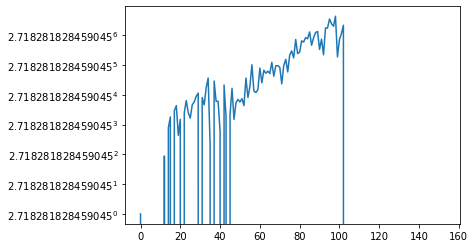

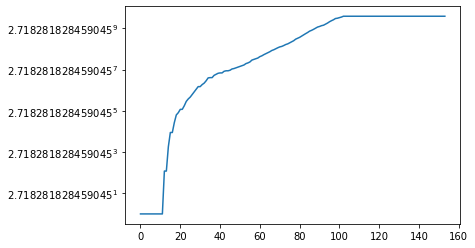

In [12]:
qq =dati_[1,:]
mpl.plot(qq)
mpl.yscale("log", basey=np.e)

mpl.figure()
hh = qq.copy()
for i in range(1,len(qq)):
    hh[i] = hh[i]+ hh[i-1]
    
mpl.plot(hh)
mpl.yscale("log", basey=np.e)

# Analysis of curves

In [15]:
# cumulative
index        =  [  0,   1,   2,    3,   4,  5,  6,  7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25, 26, 27, 28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38, 39, 40,   41,  42,  43,  44,  45,  46,  47,  48,  49,   50, 51,  52,  53, 54,   55,  56, 57, 58, 59,  60,    61, 62, 63,  64,  65,  66,  67,  68,   69, 70, 71, 72,  73,  74,  75,  76,  77]      
choice_       = [  0,   1,   1,    1,   1,  1,  1,  0,   1,   0,   1,   1,   1,   0,   1,   0,   1,   0,   1,   1,   1,   1,   1,   1,   0,   1,  1,  1,  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,  1,  1,    1,   1,   1,   1,   1,   1,   1,   1,   1,    1,  1,   1,   1,  1,    1,   0,  1,  1,  1,   1,     1,  1,  1,   1,   1,   1,   1,   1,    1,  1,  1,  1,   1,   1,   1,   1,   0]
left_margin_  = [ 10,  11,   1,    0,   0,  9, 25,  3,   6,   5,   3,   5,   0,   5,   5,   3,   0,   0,   0,   1,   0,   5,   2,  20,   4,  15, 20,  0,  1,  15,   0,   6,   4,   1,   0,   0,  10,   0,   0,  0,  0,    2,  10,   7,   8,   5,   0,   2,   5,   2,   60,  0,  26,  10,  2,   15,   3,  0,  0,  0,   5,    25,  1,  3,   0,   0,   1,   0,   7,    0,  1,  0,  1,   9,   2,   0,   0,   0]
right_margin_ = [ 25,  30,  60,   15,  15, 38, 45, 15,  30,  25,  15,  30,  60,  15,  11,  20,  30,  15,  15,  21,   9,  25,  21,  35,  20,  90, 60, 50, 40,  40,  19,  40,  58,  25,  55,  15,  40,  40,  15, 25, 30,   25,  40,  26,  21,  25,  45,  25,  30,  25,   90,  9,  58,  25, 18,   40,  11, 45, 15, 15,  35,    65, 18, 30,   9,  19,  46,  40,  60,   40, 15, 70, 15,  30,  60,  40,  65,  10]

Argentina
Argentina [ 31.  45.  45.  56.  65.  97.  97. 128. 158. 158. 225. 301. 301. 502.
 502. 589.]
Armenia
Armenia [  1.   8.   8.  26.  52.  52.  84. 122. 136. 160. 160. 190. 235. 265.
 290. 329. 372. 424. 482. 482.]
Australia
Australia [   4.    5.    5.    7.    9.    9.   12.   12.   12.   13.   14.   15.
   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.
   15.   15.   17.   21.   22.   22.   23.   23.   23.   23.   25.   27.
   33.   33.   33.   57.   62.   70.   77.   92.   92.  122.  140.  189.
  197.  298.  336.  414.  510.  709.  873. 1081. 1098. 1709. 2136. 2423.]
Austria
Austria [  2.   2.   4.   5.  10.  10.  18.  24.  29.  37.  66.  79. 102. 112.
 182. 182.]
Bahrain
Bahrain [  2.  17.  33.  33.  38.  40.  40.  49.  49.  49.  49.  49.  56.  79.
  95. 110.]
Bangladesh
Bangladesh [   8.   10.   17.   17.   24.   24.   27.   39.   39.   44.   48.   48.
   48.   49.   49.   54.   56.   61.   70.   88.  123.  164.  218.  330.
  424.  482.  621.  803. 1

/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:

Bosnia and Herzegovina
Bosnia and Herzegovina [  4.   4.  11.  11.  19.  19.  19.  36.  44.  44.  92.  92. 125. 131.
 164. 173. 213. 233. 269. 325. 359. 413. 464. 521. 586.]
Brazil
Brazil [  2.   2.   3.   7.   8.  19.  19.  25.  25.  34.  52.  98. 121. 121.
 200. 234. 291. 428. 621. 904. 904.]
Bulgaria
Bulgaria [  7.   7.   7.   7.  51.  67.  81.  92.  94. 127. 163. 163. 185.]
Cameroon
Cameroon [  2.   2.   2.   3.   3.   5.   5.  10.  15.  22.  27.  27.  40.  70.
  70.  75.  75.  75.  91. 113. 139. 139. 139. 246. 509. 555.]
Canada
Canada [1.000e+00 2.000e+00 3.000e+00 3.000e+00 3.000e+00 4.000e+00 4.000e+00
 4.000e+00 4.000e+00 4.000e+00 5.000e+00 5.000e+00 7.000e+00 7.000e+00
 7.000e+00 7.000e+00 7.000e+00 7.000e+00 7.000e+00 7.000e+00 7.000e+00
 7.000e+00 8.000e+00 8.000e+00 8.000e+00 8.000e+00 8.000e+00 9.000e+00
 9.000e+00 1.000e+01 1.000e+01 1.100e+01 1.100e+01 1.400e+01 1.400e+01
 1.900e+01 2.700e+01 3.000e+01 3.000e+01 4.500e+01 4.900e+01 5.700e+01
 6.000e+01 7.200e+01 7.700e+

/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79:

China
China [ 41.  45.  62. 121. 198. 291. 443.]
Colombia
Colombia [  1.   3.   3.   9.  16.  24.  24.  34.  45.  93. 108. 145. 196. 196.
 196. 306. 306. 470.]
Croatia
Croatia [  1.   3.   3.   5.   7.   7.   8.   9.   9.  10.  11.  11.  11.  12.
  12.  20.  20.  31.  31.  37.  56.  65.  81.  81. 126. 206. 206. 235.
 306. 382. 418.]
Cuba
Cuba [ 4.  4.  4.  4.  5. 10. 11. 16. 16. 16. 16. 48. 48. 67. 67. 80.]
Czechia
Czechia [  3.   3.   5.   5.  12.  12.  26.  32.  32.  61.  61. 116. 116. 150.
 253. 298.]
Congo
Congo [  1.   1.   2.   2.   2.   3.   7.  14.  14.  23.  23.  30.  36.  45.
  51.  54.  58.  68.  81.  98. 109.]
Denmark
Denmark [ 1.  2.  3.  4.  5.  8. 10. 18. 23. 31.]
Dominican Republic
Dominican Republic [  1.   1.   1.   5.   5.   5.   5.   5.   5.   5.  21.  21.  34.  72.
  72.  72.  72. 312. 312. 488. 488.]
Ecuador
Ecuador [  6.   7.   7.  13.  13.  14.  14.  15.  15.  15.  17.  23.  23.  23.
  37.  58. 155. 199. 367. 506.]
Egypt
Egypt [  3.   3.  48.  49.  59.  59.  67.

/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79:

Ethiopia
Ethiopia [  16.   21.   23.   26.   26.   31.   35.   38.   43.   44.   52.   55.
   56.   65.   69.   71.   74.   82.   85.   92.   96.  105.  108.  111.
  114.  116.  116.  117.  122.  123.  124.  126.  130.  131.  133.  133.
  135.  140.  145.  162.  191.  194.  210.  239.  250.  261.  263.  272.
  287.  306.  317.  352.  365.  389.  399.  433.  494.  582.  655.  701.
  731.  831.  968. 1063. 1172. 1257. 1344. 1486. 1636. 1805. 1934. 2020.
 2156. 2336. 2506. 2670.]
Finland
Finland [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00 6.000e+00 7.000e+00
 7.000e+00 7.000e+00 1.200e+01 1.900e+01 1.900e+01 3.000e+01 4.000e+01
 4.000e+01 4.000e+01 1.550e+02 1.550e+02 2.100e+02 2.670e+02 2.720e+02
 3.190e+02 3.590e+02 3.690e+02 4.500e+02 5.210e+02 5.210e+02 6.260e+02
 7.000e+02 7.920e+02 8.800e+02 9.580e+02 1.025e+03 1.218e+03]
France
France [3.000e+00 3.000e+00 3.000e+00 3.000e+00 4.000e+00 4.000e+00 6.000e+00


/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79:

Guinea
Guinea [  2.   2.   2.   2.   4.   4.   4.   5.   8.   8.  16.  16.  16.  30.
  52.  52. 111. 111. 111. 144. 164. 194. 194. 250. 250. 319. 363. 404.
 438. 438. 477. 477. 622. 688. 761.]
Honduras
Honduras [   2.    8.    9.   12.   24.   24.   24.   26.   30.   30.   52.   52.
   67.   67.  110.  139.  139.  172.  219.  222.  264.  268.  298.  305.
  312.  343.  382.  392.  393.  397.  407.  419.  426.  442.  457.  472.
  477.  494.  510.  519.  562.  591.  627.  661.  702.  738.  771.  804.
  899. 1010. 1055. 1178. 1270. 1461. 1685.]
Hungary
Hungary [  2.   4.   7.   8.   9.  12.  13.  13.  19.  25.  32.  39.  50.  58.
  73.  85. 131. 131. 167. 187. 226. 261. 300. 343. 408.]
India
India [  1.   1.   1.   2.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.
   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.
   3.   3.   3.   3.   5.   5.  27.  29.  31.  34.  39.  44.  50.  60.
  74.  81.  84. 107. 114. 137. 151. 195. 195. 283. 341. 434. 519. 606.]
Indonesia
In

/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77:

Iraq
Iraq [  1.   5.   5.   6.   8.  13.  19.  26.  31.  36.  36.  44.  54.  60.
  60.  61.  70.  70.  70.  93. 124. 124. 154. 164. 177. 193. 214. 233.
 266. 316. 346. 382. 458. 506. 547. 547. 630. 694. 772. 820. 878.]
Ireland
Ireland [  1.   1.   2.   2.  14.  18.  19.  21.  21.  34.  43.  70.  91. 129.
 169. 223.]
Israel
Israel [  1.   1.   1.   2.   2.   2.   3.   5.   7.   7.  10.  12.  15.  15.
  19.  21.  39.  39.  58.  75.  99. 126. 178. 200. 250. 304.]
Italy
Italy [  2.   2.   2.   2.   2.   2.   2.   2.   2.   3.   3.   3.   3.   3.
   3.   3.   3.   3.   3.   3.   3.   3.   3.   4.  11. 124. 229. 322.
 400. 650. 888.]
Ivory Coast
Ivory Coast [  3.   3.   3.   6.   9.   9.   9.   9.   9.  25.  25.  72.  80.  80.
  92. 140. 165. 169. 169. 190. 190. 218. 245. 261.]
Japan
Japan [  2.   3.   4.   4.   7.  11.  14.  17.  20.  20.  20.  23.  25.  25.
  25.  25.  26.  26.  28.  29.  33.  41.  53.  59.  65.  72.  73.  93.
 105. 132. 144.]
Kazakhstan
Kazakhstan [ 56.  56.  60.  63.  79

/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79:

Luxembourg
Luxembourg [   2.    2.    2.    5.    5.    5.   17.   38.   38.   38.   81.  140.
  210.  345.  484.  670.  670.  798.  875. 1099. 1333.]
Malaysia
Malaysia [  3.   4.   4.   4.   7.   8.   8.   8.   8.   8.  10.  12.  14.  15.
  16.  17.  18.  18.  18.  19.  19.  22.  22.  22.  22.  22.  22.  22.
  22.  22.  22.  22.  22.  24.  24.  24.  24.  29.  36.  36.  55.  83.
  93.  93. 117. 117.]


/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79:

Mexico
Mexico [  2.   5.   5.   5.   5.   5.   5.   7.   7.   7.   7.  11.  12.  26.
  41.  53.  82.  93. 118. 164. 164. 164. 251. 370.]
Moldova
Moldova [  4.   8.  12.  23.  29.  30.  36.  49.  66.  80.  80.  94. 109. 125.
 149. 177. 199. 231. 263. 298. 353. 423. 591. 591. 752. 864.]
Morocco
Morocco [  1.   2.   2.   2.   2.   2.   3.   5.   6.   6.  18.  28.  29.  38.
  49.  61.  74.  86. 109. 134. 143. 170. 225. 275.]
Nepal
Nepal [ 1.  2.  2.  3.  3.  3.  5.  5.  5.  5.  5.  6.  6.  9.  9.  9.  9.  9.
  9.  9. 12. 14. 16. 16. 16. 16. 30. 31. 31. 32. 42.]
Netherlands
Netherlands [  1.   2.   6.  13.  18.  28.  38.  82. 128. 188.]
Nigeria
Nigeria [  42.   46.   65.   65.   65.   65.  111.  139.  174.  190.  208.  208.
  232.  232.  254.  276.  288.  305.  318.  323.  343.  343.  373.  373.
  373.  373.  541.  541.  541.  541.  981. 1095. 1182.]
Macedonia
Macedonia [ 3.  3.  4.  7.  7.  7.  9. 13. 13. 19. 31. 31. 48. 70. 85. 85.]
Norway
Norway [   6.    7.   19.   25.   33.   33.   56.

/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79:

Peru
Peru [  9.  11.  17.  22.  28.  43.  71.  86. 145.]
Philippines
Philippines [  1.   1.   2.   2.   2.   3.   3.   3.   3.   3.   3.   3.   3.   3.
   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.
   3.   3.   3.   3.   3.   3.   3.   3.   5.   6.  10.  24.  33.  49.
  52.  52.  64. 140.]
Poland
Poland [  1.   5.   6.  11.  16.  22.  27.  51.  64.  64. 111. 150. 246. 287.
 325. 425.]
Portugal
Portugal [  2.   2.   6.   9.  13.  13.  30.  30.  41.  41.  41. 112. 112. 245.
 331. 448.]
Romania
Romania [   3.    4.    4.    6.    7.    9.   15.   15.   17.   31.   49.   64.
  113.  123.  158.  184.  246.  260.  308.  367.  367.  433.  576.  762.
  906. 1029. 1292. 1452. 1760. 1952. 2245.]
Russian Federation
Russian Federation [2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00 3.000e+00
 3.000e+00 3.000e+00 4.000e+00 7.000e+00 7.000e+00 7.000e+00 7.000e+00
 7.000e+00 7.000e+00 3.400e+01 3.400e+01 3.400e+01 3.400e+01 9.300e+01
 9.300e+01 1.470e+02 1.990e+0

/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79:

Saudi Arabia
Saudi Arabia [  1.   2.   5.   5.   7.  11.  15.  20.  21.  21.  21. 103. 103. 133.
 171. 238. 238. 274.]
Serbia
Serbia [1.000e+00 5.000e+00 1.200e+01 1.900e+01 3.100e+01 4.100e+01 4.100e+01
 5.700e+01 7.200e+01 8.200e+01 1.230e+02 1.350e+02 1.730e+02 1.730e+02
 2.190e+02 2.490e+02 3.030e+02 3.840e+02 4.570e+02 5.280e+02 6.590e+02
 7.410e+02 7.850e+02 9.000e+02 1.060e+03 1.171e+03 1.476e+03 1.624e+03]
Singapore
Singapore [ 1.  3.  3.  4.  5.  7. 10. 13. 16. 18.]
South Africa
South Africa [  1.   1.   2.   3.   3.   7.   7.  17.  17.  38.  38.  51.  62. 116.
 150. 205. 240. 240. 274. 402.]
South Korea
South Korea [1.000e+00 1.000e+00 1.000e+00 1.000e+00 2.000e+00 2.000e+00 3.000e+00
 4.000e+00 4.000e+00 4.000e+00 6.000e+00 1.100e+01 1.200e+01 1.500e+01
 1.500e+01 1.600e+01 1.800e+01 2.300e+01 2.400e+01 2.400e+01 2.700e+01
 2.700e+01 2.800e+01 2.800e+01 2.800e+01 2.800e+01 2.800e+01 2.900e+01
 3.000e+01 3.100e+01 5.100e+01 1.040e+02 2.040e+02 4.330e+02 6.020e+02
 8.330e+02 9

/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79:

Switzerland
Switzerland [  1.   6.  10.  18.  24.  30.  37.  57.  86. 209. 264. 332. 332. 491.
 645.]
Thailand
Thailand [  1.   1.   1.   1.   2.   2.   2.   2.   2.   4.   4.   4.   4.   5.
   8.  14.  14.  14.  19.  19.  19.  19.  25.  25.  25.  25.  32.  32.
  32.  33.  33.  33.  33.  34.  34.  35.  35.  35.  35.  35.  35.  35.
  35.  37.  40.  40.  41.  42.  42.  43.  43.  43.  47.  48.  50.  50.
  50.  53.  59.  70.  75.  75. 114. 147. 177. 212. 322. 322. 411. 599.
 721.]
Turkey
Turkey [1.000e+00 5.000e+00 5.000e+00 5.000e+00 4.700e+01 4.700e+01 1.910e+02
 1.910e+02 6.700e+02 9.470e+02 9.470e+02 1.236e+03 1.529e+03 1.872e+03
 2.433e+03]
Ukraine
Ukraine [  1.   3.   3.   3.   5.  14.  16.  16.  26.  47.  47.  47.  84. 113.
 156. 218. 311. 418. 480. 549. 669. 804.]
United Arab Emirates
United Arab Emirates [  4.   5.   5.   5.   5.   5.   5.   5.   7.   7.   8.   8.   8.   8.
   8.   8.   9.   9.   9.   9.   9.  11.  13.  13.  13.  13.  13.  19.
  19.  19.  21.  21.  27.  27.  27.  

/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mattia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77:

United States
United States [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 2.0000e+00 2.0000e+00
 5.0000e+00 5.0000e+00 5.0000e+00 5.0000e+00 6.0000e+00 7.0000e+00
 8.0000e+00 8.0000e+00 1.1000e+01 1.1000e+01 1.1000e+01 1.2000e+01
 1.2000e+01 1.2000e+01 1.2000e+01 1.2000e+01 1.3000e+01 1.3000e+01
 1.5000e+01 1.5000e+01 1.5000e+01 1.5000e+01 1.5000e+01 1.5000e+01
 1.5000e+01 1.5000e+01 3.4000e+01 3.5000e+01 3.5000e+01 5.3000e+01
 5.3000e+01 5.9000e+01 5.9000e+01 6.2000e+01 6.2000e+01 6.2000e+01
 6.4000e+01 1.0800e+02 1.2900e+02 1.4800e+02 2.1300e+02 2.1300e+02
 2.1300e+02 4.7200e+02 6.9600e+02 6.9600e+02 9.8700e+02 1.2640e+03
 1.6780e+03 1.7140e+03 1.7140e+03 3.5360e+03 7.0870e+03 1.0442e+04
 1.5219e+04 1.5219e+04 1.5219e+04 3.1573e+04 5.1914e+04 5.1914e+04]
Venezuela
Venezuela [ 2. 17. 17. 33. 36. 36. 36. 36. 36. 70. 77.]


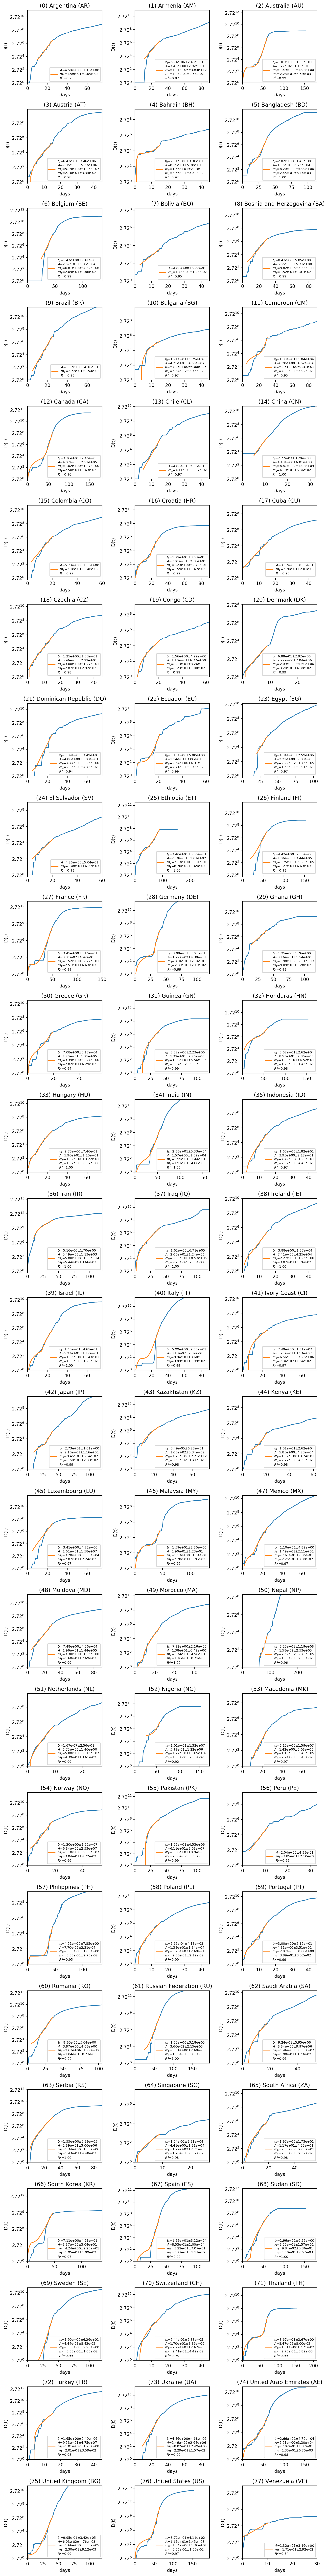

In [16]:
LL = np.shape(dati_)[0]
LY = np.shape(dati_)[1]  



mmmm = len(df_all["Population"])
if( mmmm%3 !=0):
    dddd = int(mmmm/3.) + 1
else:
    dddd = int(mmmm/3.)
    
fig, ax = mpl.subplots(26,3, dpi = 200, figsize=[10,3*26])
   

start_y = np.array([2,3,4,5])

slope_vet = np.zeros((LL,9))


count = 0
for i in range(LL):

        my_nation = data_lord["Nation"][i]
        print(my_nation)
        my_acronym = np.array(data_all["Acronym"][data_all["Nation"] == my_nation])[0]
        my_pop = float(data_all["Population"][data_all["Nation"] == my_nation])

        
        x = np.arange(LY)

        #y = dati_[i,:] -1
        y = dati_[i,:].copy()  
        y[y<0] = 0
        
        for jj in range(1,len(y)):
            y[jj] = y[jj] + y[jj-1]
        
        mask = y>0
       
        x = x[mask]
        y_ = y[mask].copy()
        y = y[mask].copy()
        #y = np.log(y[mask])

        ii = int(count/3)
        jj = count%3
        count += 1
        ax[ii,jj].plot(x, y)
    
    
        mask_2 =  np.logical_and(x>=left_margin_[i],x<= right_margin_[i]) # y< np.min(y) + 200# np.arange(len(x))<8 # #np.logical_and(y>left_y, y<=right_y)

        if(np.sum(mask_2)>2):
            
            #left_y = 0
            #right_y = left_y + 3
            
            print(my_nation,y[mask_2])
            #ddyy = np.sqrt(my_pop)/y_[mask_2]
            ddyy = 1./y_[mask_2]*np.sqrt(y_[mask_2])
                
            if(choice_[i]==1):
                par, r2, X2,F, res_ = fit_func(x[mask_2], y[mask_2], [1], combo, par = [1,1,1,1])
                slope_vet[i,0] = par[0,0]
                slope_vet[i,1] = par[1,0]
                slope_vet[i,2] = par[2,0]
                slope_vet[i,3] = par[3,0]
                
                slope_vet[i,4] = par[0,1]
                slope_vet[i,5] = par[1,1]
                slope_vet[i,6] = par[2,1]
                slope_vet[i,7] = par[3,1]
                slope_vet[i,8] = r2
                ax[ii,jj].plot(x[mask_2], combo(x[mask_2],par[0,0], par[1,0],par[2,0], par[3,0]), label = "$t_0$=%.2e$\\pm$%.2e\n$A$=%.2e$\\pm$%.2e\n$m_0$=%.2e$\\pm$%.2e\n$m_1$=%.2e$\\pm$%.2e\n$R^2$=%.2f"%(np.abs(par[0,0]),par[0,1],np.abs(par[1,0]),par[1,1],np.abs(par[2,0]),par[2,1],np.abs(par[3,0]),par[3,1],r2))
           
                df_all["m0"][df_all["Nation"]==my_nation] =  par[2,0] #np.mean(slope_vet[i,:][slope_vet[i,:]!=0])
                df_all["dm0"][df_all["Nation"]==my_nation] = par[2,1]  #np.std(slope_vet[i,:][slope_vet[i,:]!=0])
                df_all["m1"][df_all["Nation"]==my_nation] =  par[3,0] #np.mean(slope_vet[i,:][slope_vet[i,:]!=0])
                df_all["dm1"][df_all["Nation"]==my_nation] = par[3,1]  #np.std(slope_vet[i,:][slope_vet[i,:]!=0])
                df_all["R2"][df_all["Nation"]==my_nation] = r2

                ax[ii,jj].set_ylim([1,np.max(combo(x[mask_2],par[0,0], par[1,0],par[2,0], par[3,0]))*100])
        
            
            else:
                par, r2, X2,F, res_ = fit_func(x[mask_2], y[mask_2], [1], exp_fit, par = [1,1])
            
                slope_vet[i,0] = 0
                slope_vet[i,1] = par[0,0]
                slope_vet[i,2] = 0
                slope_vet[i,3] = par[1,0]
            
                slope_vet[i,4] = 0
                slope_vet[i,5] = par[0,1]
                slope_vet[i,6] = 0
                slope_vet[i,7] = par[1,1]
                slope_vet[i,8] = r2
                ax[ii,jj].plot(x[mask_2], exp_fit(x[mask_2],par[0,0], par[1,0]), label = "$A$=%.2e$\\pm$%.2e\n$m_1$=%.2e$\\pm$%.2e\n$R^2$=%.2f"%(np.abs(par[0,0]),par[0,1],np.abs(par[1,0]),par[1,1],r2))
       
                df_all["m0"][df_all["Nation"]==my_nation] =  0 #np.mean(slope_vet[i,:][slope_vet[i,:]!=0])
                df_all["dm0"][df_all["Nation"]==my_nation] = 0  #np.std(slope_vet[i,:][slope_vet[i,:]!=0])
                df_all["m1"][df_all["Nation"]==my_nation] =  par[1,0] #np.mean(slope_vet[i,:][slope_vet[i,:]!=0])
                df_all["dm1"][df_all["Nation"]==my_nation] = par[1,1]  #np.std(slope_vet[i,:][slope_vet[i,:]!=0])
                df_all["R2"][df_all["Nation"]==my_nation] = r2


                ax[ii,jj].set_ylim([1,np.max(exp_fit(x[mask_2],par[0,0], par[1,0]))*100])
        
        
        ax[ii,jj].set_title("(%d) %s (%s)"%(i,my_nation,my_acronym))
        ax[ii,jj].legend(loc =4, fontsize = "x-small")
        ax[ii,jj].set_ylabel("D(t)")
        ax[ii,jj].set_xlabel("days")
        
        
        
        ax[ii,jj].set_xlim([0,x[mask_2][-1]*3])
        ax[ii,jj].set_yscale("log", basey=2.72)
        
        

#ax[-1,-1].axis("off")
#ax[-1,-2].axis("off")

mpl.tight_layout()


mpl.savefig("Fits_World.pdf")

#mpl.yscale("log")

# EUROPE 

In [17]:
selected_vec_eu = ["Austria","Belgium","Bosnia and Herzegovina", "Bulgaria",
                   "Croatia","Czechia","Denmark","Finland","France", "Germany",
                   "Greece","Hungary","Ireland","Italy","Luxembourg","Moldova",
                   "Netherlands", "Macedonia","Norway","Poland","Portugal",
                   "Romania","Russian Federation","Serbia", "Spain","Sweden",
                   "Switzerland","Ukraine","United Kingdom"]


In [18]:
len(selected_vec_eu)
#df_all[mask_EU]


29

countries 29
Fitting p2 - cost
fit params:

c = 1.90e-01  +-  1.17e-02
R2 = -0.340
X2 = 1110.972
*** ----- ****


Fitting p2
fit params:

m = -2.72e+00  +-  1.47e+00
q = 2.55e+00  +-  1.28e+00
R2 = -0.297
X2 = 985.922
*** ----- ****


Fitting p4 -- const
fit params:

c = 1.90e-01  +-  1.17e-02
R2 = -0.340
X2 = 1110.972
*** ----- ****


Fitting p4 -- linear
fit params:

m = 1.91e+00  +-  3.65e-01
q = -9.49e-01  +-  2.27e-01
R2 = 0.505
X2 = 0.109
*** ----- ****


Fitting p8 -- const
fit params:

c = 1.90e-01  +-  1.17e-02
R2 = -0.340
X2 = 1110.972
*** ----- ****


Fitting p8 -- linear
fit params:

m = 1.53e+00  +-  3.80e-01
q = -6.10e-01  +-  1.98e-01
R2 = 0.383
X2 = 692.973
*** ----- ****


F(2 vs 4)


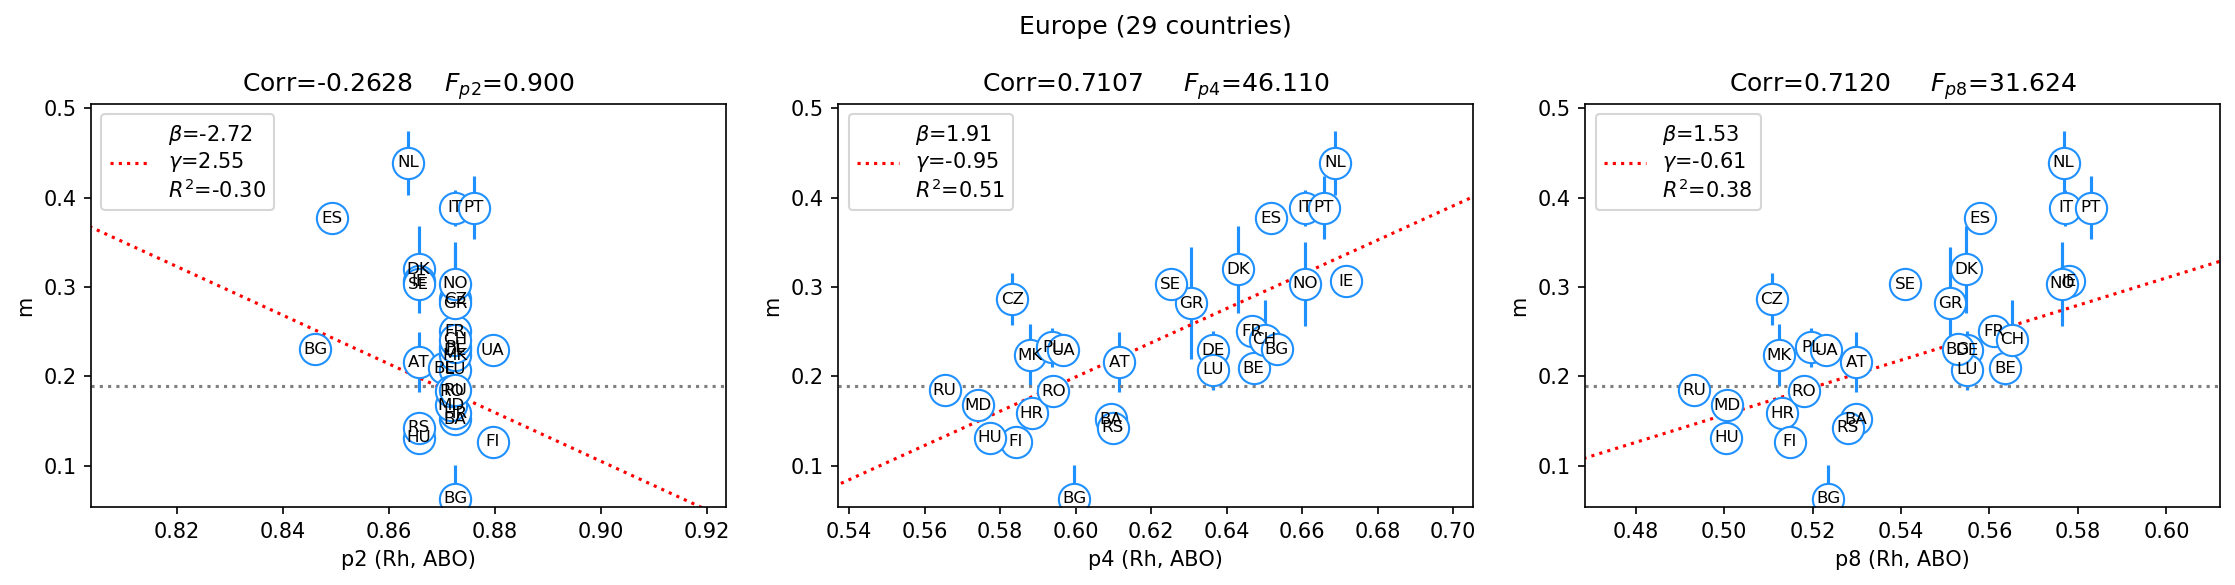

In [20]:
mask_EU = np.in1d(df_all["Nation"], selected_vec_eu) #np.logical_and(df_all["R2"]>0, df_all["Continent"] == "EU")
mask_EU = np.logical_and(mask_EU,df_all["m1"]!=0)

names_EU = np.array(df_all["Acronym"][mask_EU])
pop = np.array(df_all["Population"][mask_EU])


DX = 0 #0.001
DY = 0#-0.01

fig, ax = mpl.subplots(1,3,dpi = 150, figsize=[15,4])

#p2
x_2 = np.array(df_all["p2"][mask_EU])
x_4 = np.array(df_all["p4"][mask_EU])
x_8 = np.array(df_all["p8"][mask_EU])

y = np.array(df_all["m1"][mask_EU])

dy = np.array(df_all["dm1"][mask_EU])



ax[0].errorbar(x_2,y,yerr=dy, ls="", marker="o", mec="dodgerblue", color="dodgerblue", mew=1, mfc="white", ms =15)
ax[1].errorbar(x_4,y,yerr=dy, ls="", marker="o", mec="dodgerblue", color="dodgerblue", mew=1, mfc="white", ms =15)
ax[2].errorbar(x_8,y,yerr=dy, ls="", marker="o", mec="dodgerblue", color="dodgerblue", mew=1, mfc="white", ms =15)

print("countries", len(x_2))
for i in range(len(x_2)):
    ax[0].text(x_2[i]+DX, y[i]+DY, s = names_EU[i], horizontalalignment='center', verticalalignment='center', fontsize=8)
    ax[1].text(x_4[i]+DX, y[i]+DY, s = names_EU[i], horizontalalignment='center', verticalalignment='center', fontsize=8)
    ax[2].text(x_8[i]+DX, y[i]+DY, s = names_EU[i], horizontalalignment='center', verticalalignment='center', fontsize=8)
    
ax[0].set_xlabel("p2 (Rh, ABO)")
ax[1].set_xlabel("p4 (Rh, ABO)")
ax[2].set_xlabel("p8 (Rh, ABO)")
ax[0].set_ylabel("m")
ax[1].set_ylabel("m")
ax[2].set_ylabel("m")



ax[0].set_xlim([np.min(x_2)*0.95,np.max(x_2)*1.05])
ax[1].set_xlim([np.min(x_4)*0.95,np.max(x_4)*1.05])
ax[2].set_xlim([np.min(x_8)*0.95,np.max(x_8)*1.05])

ax[0].set_ylim([np.min(y)*0.85,np.max(y)*1.15])
ax[1].set_ylim([np.min(y)*0.85,np.max(y)*1.15])
ax[2].set_ylim([np.min(y)*0.85,np.max(y)*1.15])


print("Fitting p2 - cost")    
par_2_, r2_2_, X2_2_, F_2_, RES_2_= fit_func(x_2, y,dy, const_fit, par = [1])
print("fit params:\n")
print("c = %.2e  +-  %.2e"%(par_2_[0,0], par_2_[0,1]))
print("R2 = %.3f"%r2_2_)
print("X2 = %.3f"%X2_2_)
print("*** ----- ****\n\n")    


print("Fitting p2")    
par_2, r2_2, X2_2, F_2, RES_2 = fit_func(x_2, y,dy, lin_fit, par = [1,1])
print("fit params:\n")
print("m = %.2e  +-  %.2e"%(par_2[0,0], par_2[0,1]))
print("q = %.2e  +-  %.2e"%(par_2[1,0], par_2[1,1]))
print("R2 = %.3f"%r2_2)
print("X2 = %.3f"%X2_2)
print("*** ----- ****\n\n")    



print("Fitting p4 -- const")    
par_4_, r2_4_, X2_4_, F_4_, RES_4_ = fit_func(x_4, y,dy, const_fit, par = [1])
print("fit params:\n")
print("c = %.2e  +-  %.2e"%(par_4_[0,0], par_4_[0,1]))
print("R2 = %.3f"%r2_4_)
print("X2 = %.3f"%X2_4_)
print("*** ----- ****\n\n")    


print("Fitting p4 -- linear")    
par_4, r2_4, X2_4, F_4, RES_4 = fit_func(x_4, y,[1], lin_fit, par = [1,1])
print("fit params:\n")
print("m = %.2e  +-  %.2e"%(par_4[0,0], par_4[0,1]))
print("q = %.2e  +-  %.2e"%(par_4[1,0], par_4[1,1]))
print("R2 = %.3f"%r2_4)
print("X2 = %.3f"%X2_4)
print("*** ----- ****\n\n")    



print("Fitting p8 -- const")    
par_8_, r2_8_, X2_8_, F_8_, RES_8_ = fit_func(x_8, y,dy, const_fit, par = [1])
print("fit params:\n")
print("c = %.2e  +-  %.2e"%(par_8_[0,0], par_8_[0,1]))
print("R2 = %.3f"%r2_8_)
print("X2 = %.3f"%X2_8_)
print("*** ----- ****\n\n")    


print("Fitting p8 -- linear")    
par_8, r2_8, X2_8, F_8, RES_8 = fit_func(x_8, y,dy, lin_fit, par = [1,1])
print("fit params:\n")
print("m = %.2e  +-  %.2e"%(par_8[0,0], par_8[0,1]))
print("q = %.2e  +-  %.2e"%(par_8[1,0], par_8[1,1]))
print("R2 = %.3f"%r2_8)
print("X2 = %.3f"%X2_8)
print("*** ----- ****\n\n")    



ax[0].axhline(par_2_[0,0], color = "grey", ls=":")
ax[1].axhline(par_4_[0,0], color = "grey", ls=":")
ax[2].axhline(par_8_[0,0], color = "grey", ls=":")


xxx = np.linspace(0,1,100)
yyy = lin_fit(xxx, par_2[0,0], par_2[1,0])
ax[0].plot(xxx,yyy, color="red", ls=":", label="$\\beta$=%.2f\n$\\gamma$=%.2f\n$R^2$=%.2f"%(par_2[0,0],par_2[1,0],r2_2))
yyy = lin_fit(xxx, par_4[0,0], par_4[1,0])
ax[1].plot(xxx,yyy, color="red", ls=":", label="$\\beta$=%.2f\n$\\gamma$=%.2f\n$R^2$=%.2f"%(par_4[0,0],par_4[1,0],r2_4))
yyy = lin_fit(xxx, par_8[0,0], par_8[1,0])
ax[2].plot(xxx,yyy, color="red", ls=":", label="$\\beta$=%.2f\n$\\gamma$=%.2f\n$R^2$=%.2f"%(par_8[0,0],par_8[1,0],r2_8))

f_p2 = X2_2_/X2_2*(len(y)-2.)/(len(y)-1.)
F_2__ = (len(y)-2)*(RES_2_ - RES_2)/RES_2
#ax[0].set_title("p1 $\\chi^2$=%.3e\np2 Corr=%.2f\t $\chi^2$=%.3e\t $f_{p2}=$%.3f\n$F_{p2}$=%.3f"%(X2_2_,np.corrcoef(x_2,y)[0,1], X2_2,f_p2,F_2__))
ax[0].set_title("Corr=%.4f\t$F_{p2}$=%.3f"%(np.corrcoef(x_2,y)[0,1], F_2__))

F_4__ = (len(y)-2)*(RES_4_ - RES_4)/RES_4
f_p4 = X2_4_/X2_4*(len(y)-2.)/(len(y)-1.)
#ax[1].set_title("Europe, States=%d\n\np4 Corr=%.2f\t $\\chi^2$=%.3e\t $f_{p4}=$%.3f\n$F_{p4}$=%.3f"%(len(y),np.corrcoef(x_4,y)[0,1], X2_4,f_p4, F_4__))
ax[1].set_title("Europe (%d countries)\n\nCorr=%.4f\t$F_{p4}$=%.3f"%(len(selected_vec_eu),np.corrcoef(x_4,y)[0,1], F_4__))

F_8__ = (len(y)-2)*(RES_8_ - RES_8)/RES_8
f_p8 = X2_8_/X2_8*(len(y)-2.)/(len(y)-1.)
#ax[2].set_title("p8 Corr=%.2f\t $\\chi^2$=%.3e\t $f_{p8}=$%.3f\n$F_{p8}$=%.3f"%(np.corrcoef(x_8,y)[0,1], X2_8,f_p8,F_8__ ))
ax[2].set_title("Corr=%.4f\t$F_{p8}$=%.3f"%(np.corrcoef(x_8,y)[0,1], F_8__))

print("F(2 vs 4)",)

ax[0].legend(loc=2)
ax[1].legend(loc=2)
ax[2].legend(loc=2)

mpl.tight_layout()

In [21]:
#df_AS.to_csv("/home/mattia/Dropbox/Projects/Zernike/Papers/BloodGroups/df_AS.csv")

tmp = df_all[df_all["R2"]>0][["Nation","Continent","Acronym","O-","A-","B-","AB-","O+","A+","B+","AB+","p2","p4","p8","m1","dm1","R2"]]


df__ = pd.DataFrame(tmp[["Nation", "Continent","Acronym"]], columns= ["Nation", "Continent","Acronym"]) 




df__.insert(3,"O+", np.around(tmp["O+"]*100,decimals=2), True)
df__.insert(4,"A+", np.around(tmp["A+"]*100,decimals=2), True)
df__.insert(5,"B+", np.around(tmp["B+"]*100,decimals=2), True)
df__.insert(6,"AB+", np.around(tmp["AB+"]*100,decimals=2), True)

df__.insert(7,"O-", np.around(tmp["O-"]*100,decimals=2), True)
df__.insert(8,"A-", np.around(tmp["A-"]*100,decimals=2), True)
df__.insert(9,"B-", np.around(tmp["B-"]*100,decimals=2), True)
df__.insert(10,"AB-", np.around(tmp["AB-"]*100,decimals=2), True)


df__.insert(11,"p2", np.around(tmp["p2"],decimals=3), True)
df__.insert(12,"p4", np.around(tmp["p4"],decimals=3), True)
df__.insert(13,"p8", np.around(tmp["p8"],decimals=3), True)


mmmmm = np.array(tmp["m1"])
dmmmmm = np.array(tmp["dm1"])

for i in range(len(mmmmm)):
    if(dmmmmm[i]<mmmmm[i]*0.15):
        dmmmmm[i] = mmmmm[i]*0.15


df__.insert(14,"m", np.around(mmmmm,decimals=3), True)
df__.insert(15,"dm", np.around(tmp["dm1"],decimals=3), True)
df__.insert(16,"dm15", np.around(dmmmmm,decimals=3), True)
df__.insert(17,"R2", np.around(tmp["R2"],decimals=2), True)


df__.to_csv("df_world_new.csv",index=False)